In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
gender = pd.read_csv('Transformed Data Set - Sheet1.csv')
gender.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


# What is the Goal
- Understand the data.
- EDA 
- Feature engineer the crap out of it using categorical encoding
- Get at least 90% accuracy using models and hyperparameter as well as the importance of cross validation
- Using Evaluation metrics to measure performance
- Deploy using flask
- A storage mechanism for new data

### Understanding the data
- checking for missing data
- Unbalanced classes
- 

In [3]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
Favorite Color          66 non-null object
Favorite Music Genre    66 non-null object
Favorite Beverage       66 non-null object
Favorite Soft Drink     66 non-null object
Gender                  66 non-null object
dtypes: object(5)
memory usage: 2.7+ KB


In [4]:
gender.isna().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

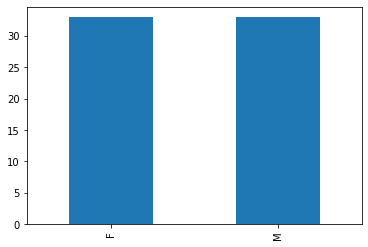

In [5]:
gender['Gender'].value_counts().plot.bar()

#### Observation
- All categorical variables
- 66 in number ( quite small)
- No missing values (which is good)
- Balanced classes. ( Too perfect)

It is time to split the train and test set


In [6]:
from sklearn.model_selection import train_test_split
gender_train, gender_test = train_test_split(gender,test_size=0.3, random_state = 42)

In [7]:
gender_train.Gender.value_counts()

M    24
F    22
Name: Gender, dtype: int64

In [8]:
gender_test.Gender.value_counts()

F    11
M     9
Name: Gender, dtype: int64

The class-imbalance is not that significant so we are good

### EDA
- this involves understanding the different categories in column individually
- See the relationship of each column to the target variable
- See the relationship between one another


 The correlation matrix will be saved for when the data has been feature engineering cos correlation only works for numerical data

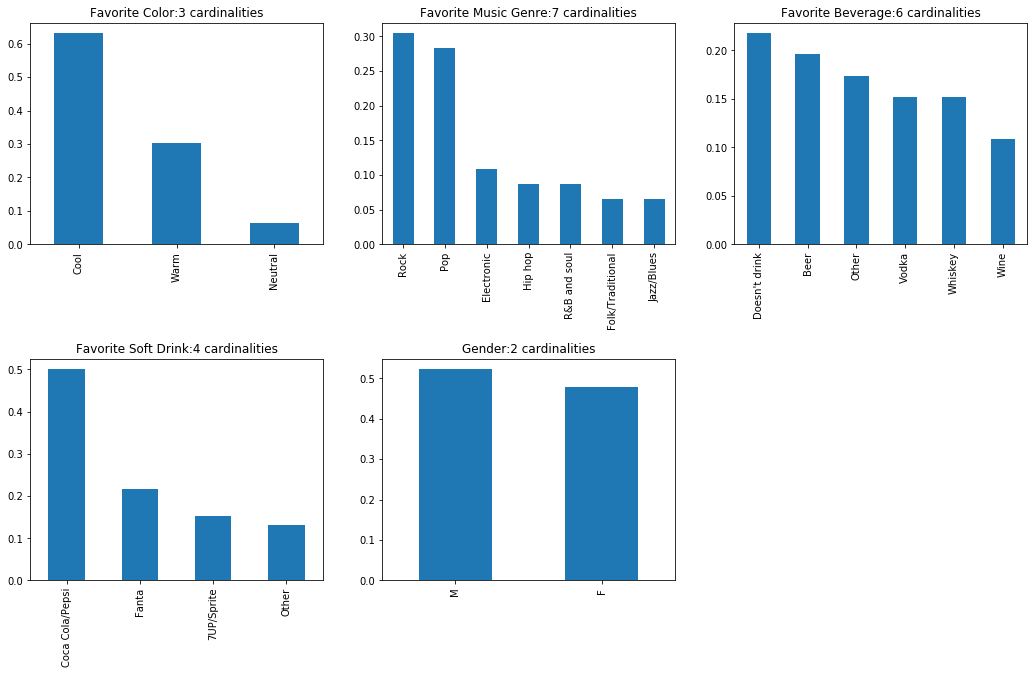

In [9]:
col_names = gender.columns
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(col_names,start=1):
    fig.tight_layout(pad=3.00)
#     plt.figure(figsize=(8,8))
    plt.subplot(2,3, i, )
    cardinal = gender_train[col].nunique()
    plt.title(f'{col}:{cardinal} cardinalities')
    gender_train[col].value_counts(normalize=True).plot.bar()
# plt.figure()|

#### Observation
- Dominant favorite color here is cool and the least is neutral which is less than 0.2 percent. 
- Dominant genre is hip/hop and R&B, jazz & folk are less than 10% . There is room to fix this rare labels by combining them together
- For the alcohol , I may need to add the wine or find a better well to feature engineer it 
- This looks ok to me  . I am still afraid of overfitting I may combine the 7ups and the others 
- The gender looks good


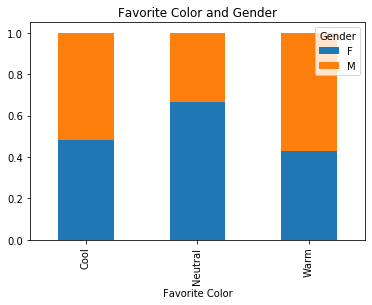

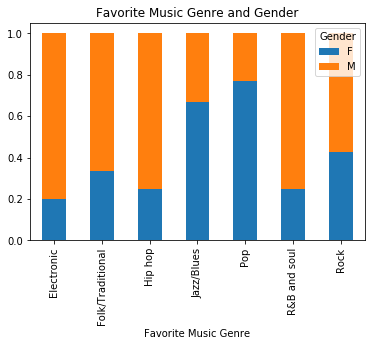

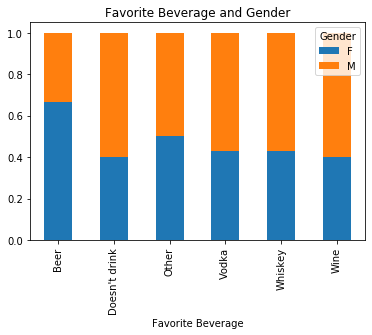

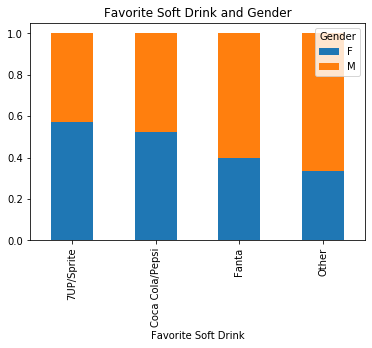

In [10]:
new_col = col_names[:-1]
# fig = plt.figure(figsize=(15,10))
for i, col in enumerate(new_col,start=1):
  #  fig.tight_layout(pad=3.00)
    new_gender=pd.crosstab(gender_train[col],gender_train['Gender']) 
    new_gender.div(new_gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
    plt.title(f'{col} and Gender')

#### observation
- most females are like more neutral color
- most males are into electronic and Folk genre while most females are into pop and jazz
- Most femals like beer while the rest are the same
- Most females like 7up/sprite while the males prefer others


Let's the relationship for other features

#### FOR Favourite Colour

In [11]:
colour_col = gender_train.drop(['Favorite Color','Gender'] ,axis=1).columns
genre_col = gender_train.drop(['Favorite Music Genre','Gender', 'Favorite Color'] ,axis=1).columns
beverage_col = gender_train.drop(['Favorite Beverage','Favorite Music Genre','Gender', 'Favorite Color' ] ,axis=1).columns

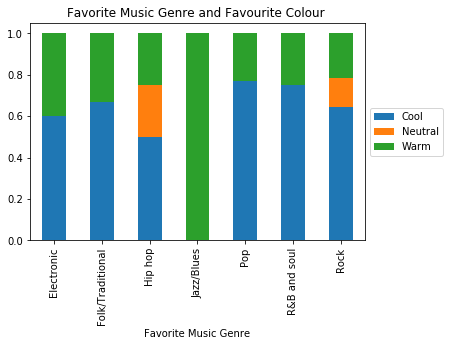

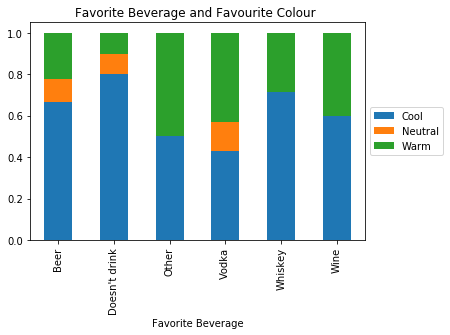

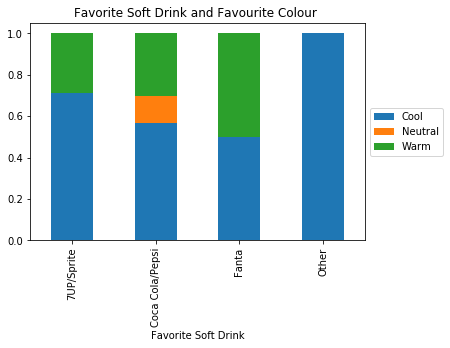

In [12]:

# fig = plt.figure(figsize=(15,10))
for i, col in enumerate(colour_col,start=1):
  #  fig.tight_layout(pad=3.00)
    new_gender=pd.crosstab(gender_train[col],gender_train['Favorite Color']) 
    new_gender.div(new_gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'{col} and Favourite Colour ')

#### Observation
- the only groups who like neutral colours like hip and rock
- All jazz lovers are warm lover
- The neutral colour lovers like vodka, dont think and beer
- The neutral lovers are coca cola fans

#### foR Favourite Genre

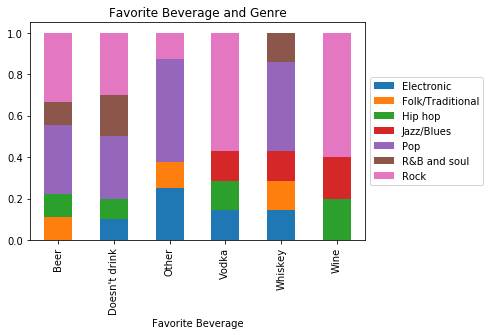

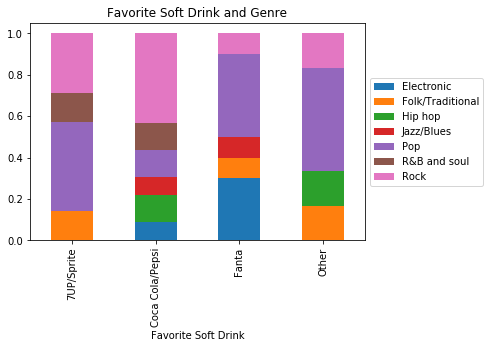

In [13]:
for i, col in enumerate(genre_col,start=1):
  #  fig.tight_layout(pad=3.00)
    new_gender=pd.crosstab(gender_train[col],gender_train['Favorite Music Genre']) 
    new_gender.div(new_gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'{col} and Genre')

#### Observation
- The r& b  lovers only like beer, don't drink and whiskey
- While the electronic lovers dont'drink, like others, vodka and whiskey
- R&B = coke and 7up

#### For Alchohol

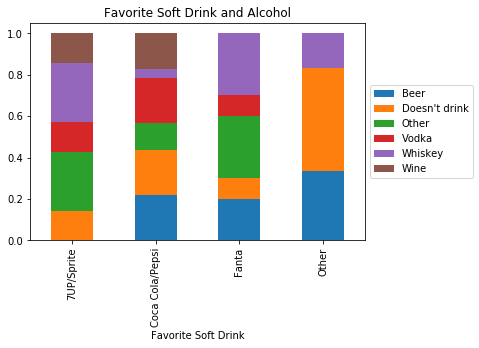

In [14]:
for i, col in enumerate(beverage_col,start=1):
  #  fig.tight_layout(pad=3.00)
    new_gender=pd.crosstab(gender_train[col],gender_train['Favorite Beverage']) 
    new_gender.div(new_gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'{col} and Alcohol')

#### Observation
- People who like wine dont like fanta and others
- people who don't drink like all soft drinks
- Please who are into other alcohol as well as Vodka like only the major brands

 I wonder if this is valuable information
 The next step is to group the rare values

### Feature Engineering

- music genre  = maybe when cardinality is less than 0.1
- Alcohol = maybe when cardinality is less o.15 . Combine with others
- Soft drink = maybe when cardinality is less than 0.2, combine and put others

In [15]:
gender_train.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
6,Cool,Pop,Beer,Coca Cola/Pepsi,F
28,Cool,Pop,Doesn't drink,Coca Cola/Pepsi,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
48,Cool,Rock,Doesn't drink,Other,M
36,Neutral,Rock,Doesn't drink,Coca Cola/Pepsi,M


In [16]:
# col_to_feature = gender_train.columns[1:-1]
# col_to_feature

# col_to_feature.tolist()

# per_to_use = [0.1, 0.15, 0.2]
# new_dict = dict(zip(col_to_feature, per_to_use))
# new_dict

# for x in gender_train[[col_to_feature]]:
#     new_series = gender_train[x].value_counts(normalize=True)
#     for i,y in new_series.items():
#         if x in new_dict.keys():
#             prop = new_dict[x]
#             if y > prop:
                

# if gender_train['Favorite Music Genre'].value_counts(normalize=True) > 0.1:
#     print gender_train['Favorite Music Genre'].value_counts(normalize=True)

# x = gender_train['Favorite Music Genre'].value_counts(normalize=True)

# type(x)

# for i, y in x.items():
#     if  y < 0.1:
#         print(i)

# x

# list

In [17]:
# temp = gender_train.groupby('Favorite Music Genre')['Favorite Music Genre'].count()/len(gender_train)
# new = [i for i in temp.loc[temp > 0.1].index.values ]



In [18]:
# new

In [19]:
def find_non_rare_labels(df, variable, tolerance):
    temp = df[variable].value_counts(normalize=True)
    labels = [i for i in temp.loc[temp >tolerance ].index.values]
    return labels

In [20]:
col_to_feature = gender_train.columns[1:-1]
col_to_feature.tolist()

per_to_use = [0.1, 0.15, 0.2]
new_dict = dict(zip(col_to_feature, per_to_use))

In [21]:
def rare_encoding(train,test, variable,tolerance):
    frequent_cat = find_non_rare_labels(train, variable, tolerance)
    train[variable] = np.where(train[variable].isin (frequent_cat), train[variable], 'Other')
    test[variable] = np.where(test[variable].isin (frequent_cat), test[variable], 'Other')
    
    return train, test
    

In [22]:
for col in new_dict:
    gender_train, gender_test= rare_encoding(gender_train, gender_test , col,new_dict[col])

In [23]:
new_dict

{'Favorite Music Genre': 0.1,
 'Favorite Beverage': 0.15,
 'Favorite Soft Drink': 0.2}

In [24]:
gender_train.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [25]:
gender_train.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
6,Cool,Pop,Beer,Coca Cola/Pepsi,F
28,Cool,Pop,Doesn't drink,Coca Cola/Pepsi,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
48,Cool,Rock,Doesn't drink,Other,M
36,Neutral,Rock,Doesn't drink,Coca Cola/Pepsi,M


In [26]:
gender_train['Favorite Music Genre'].value_counts()

Rock          14
Other         14
Pop           13
Electronic     5
Name: Favorite Music Genre, dtype: int64

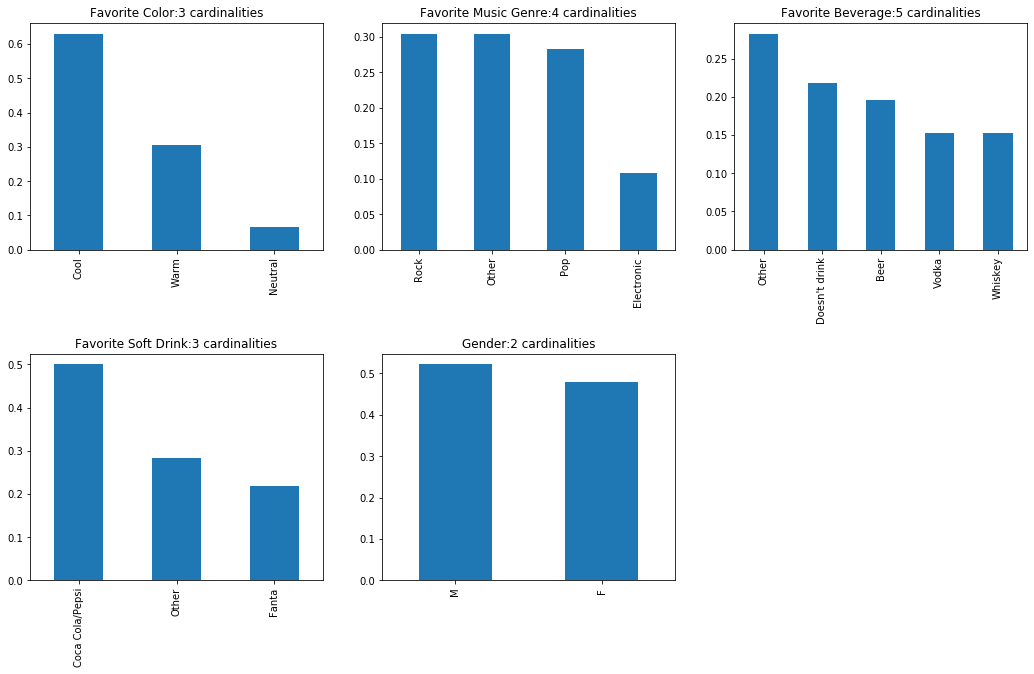

In [27]:
col_names = gender.columns
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(col_names,start=1):
    fig.tight_layout(pad=3.00)
#     plt.figure(figsize=(8,8))
    plt.subplot(2,3, i, )
    cardinal = gender_train[col].nunique()
    plt.title(f'{col}:{cardinal} cardinalities')
    gender_train[col].value_counts(normalize=True).plot.bar()

In [28]:
def find_category_mappings(df, variable, target):

    tmp = pd.DataFrame(df.groupby([variable])[target].mean())
    
    tmp['non-target'] = 1 - tmp[target]
    
    tmp['ratio'] = np.log(tmp[target] / tmp['non-target'])

    label_dict = tmp['ratio'].to_dict()
    return label_dict

In [29]:
# def encoding(df, variable, target):
#     label_dict = find_category_mappings(df, variable, target)
#     df[variable] = df[variable].map(label_dict)
#     return df,label_dict
def integer_encode(train, test, variable, ordinal_mapping):

    train[variable] = train[variable].map(ordinal_mapping)
    test[variable] = test[variable].map(ordinal_mapping)

In [30]:
gender_train['Gender'] = np.where(gender_train['Gender'] == 'F', 1, 0)
gender_test['Gender'] = np.where(gender_test['Gender'] == 'F', 1, 0)

for col in new_col:
    label_dict = find_category_mappings(gender_train, col, 'Gender')
    integer_encode(gender_train,gender_test, col, label_dict)

In [31]:
gender_train.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
6,-0.068993,1.203973,0.693147,0.087011,1
28,-0.068993,1.203973,-0.405465,0.087011,1
4,-0.068993,-0.287682,-0.287682,0.087011,1
48,-0.068993,-0.287682,-0.405465,-0.154151,0
36,0.693147,-0.287682,-0.405465,0.087011,0


In [32]:
gender_train.groupby(['Favorite Color'])['Gender'].mean()

Favorite Color
-0.287682    0.428571
-0.068993    0.482759
 0.693147    0.666667
Name: Gender, dtype: float64

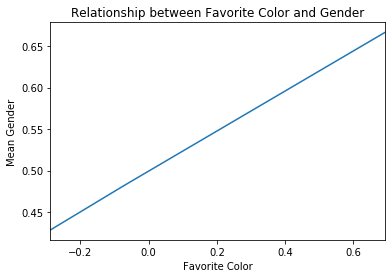

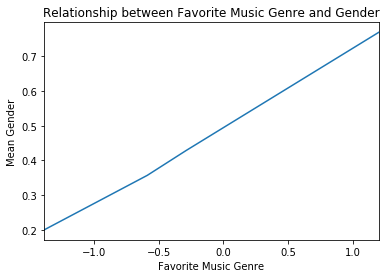

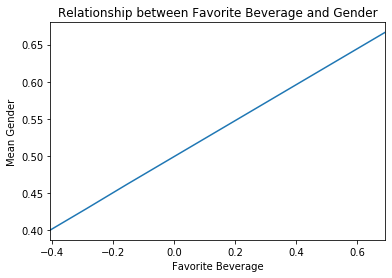

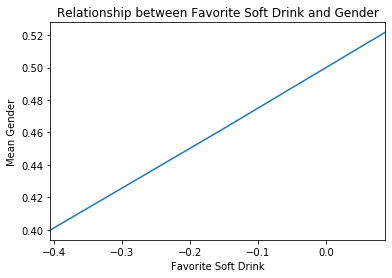

In [33]:
for var in new_col:
    
    fig = plt.figure()
    fig = gender_train.groupby([var])['Gender'].mean().plot()
    fig.set_title(f'Relationship between {var} and Gender')
    fig.set_ylabel('Mean Gender')
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1df06320>,
      dtype=object)

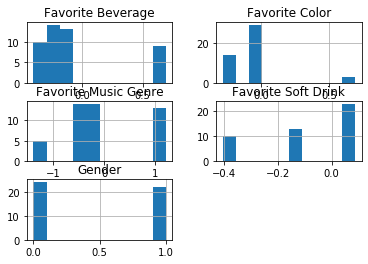

In [34]:
gender_train.hist()

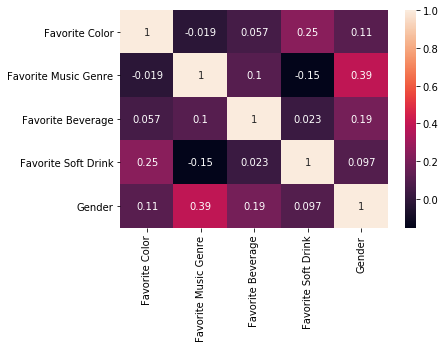

In [35]:
import seaborn as sns
sns.heatmap(gender_train.corr(), annot=True)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [37]:
def X_and_y(df):

    X = df.drop('Gender', axis=1)
    y = df['Gender']
    return X, y

In [38]:

X_train, y_train = X_and_y(gender_train)
X_test, y_test = X_and_y(gender_test)

In [39]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg.score(X_train, y_train), lg.score(X_test, y_test)

(0.717391304347826, 0.5)

In [40]:
gender_test

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
54,-0.068993,-1.386294,-0.405465,-0.405465,0
62,-0.068993,-0.587787,0.693147,0.087011,0
0,-0.068993,-0.287682,-0.287682,-0.154151,1
45,-0.068993,-0.587787,0.693147,0.087011,0
5,-0.287682,-0.587787,-0.405465,-0.405465,1
63,0.693147,-0.587787,-0.405465,-0.405465,0
16,-0.068993,1.203973,-0.154151,-0.154151,1
12,-0.287682,1.203973,-0.154151,-0.154151,1
65,-0.068993,-1.386294,0.693147,0.087011,0
30,-0.287682,-0.287682,-0.154151,0.087011,1


In [41]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9130434782608695, 0.4)

In [42]:
lg_pred = lg.predict(X_test)
rf_pred = rf.predict(X_test)

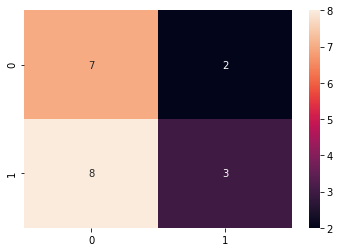

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test, lg_pred), annot=True)

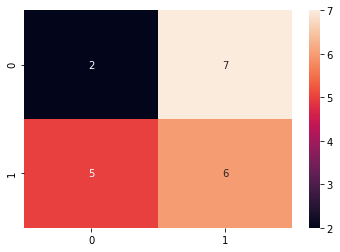

In [44]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True)

In [45]:
print(classification_report(y_test, rf_pred))
print('\n\n')
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

           0       0.29      0.22      0.25         9
           1       0.46      0.55      0.50        11

    accuracy                           0.40        20
   macro avg       0.37      0.38      0.37        20
weighted avg       0.38      0.40      0.39        20




              precision    recall  f1-score   support

           0       0.47      0.78      0.58         9
           1       0.60      0.27      0.37        11

    accuracy                           0.50        20
   macro avg       0.53      0.53      0.48        20
weighted avg       0.54      0.50      0.47        20



In [46]:
for feature in sorted(zip(X_train.columns, rf.feature_importances_),  key=lambda x: x[1], reverse = True):
    print(feature)

('Favorite Beverage', 0.3545586791830787)
('Favorite Music Genre', 0.31958752183278066)
('Favorite Color', 0.1833884883775827)
('Favorite Soft Drink', 0.14246531060655795)


In [47]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf, threshold=0.12)

In [48]:
sfm.fit(X_train, y_train)
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [49]:
rf_im = RandomForestClassifier(random_state=42)
rf_im.fit(X_important_train, y_train)
lg_im = LogisticRegression()
lg_im.fit(X_important_train, y_train)
print(lg_im.score(X_important_train, y_train), lg_im.score(X_important_test, y_test))
print('\n\n')
print(rf_im.score(X_important_train, y_train), rf_im.score(X_important_test, y_test))

0.717391304347826 0.5



0.9130434782608695 0.4


In [50]:
lg_pred_im = lg_im.predict(X_test)
rf_pred_im = rf_im.predict(X_test)

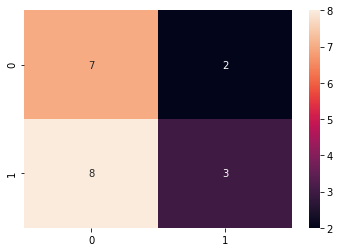

In [51]:
sns.heatmap(confusion_matrix(y_test, lg_pred_im), annot=True)

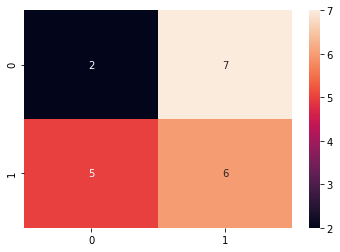

In [52]:
sns.heatmap(confusion_matrix(y_test, rf_pred_im), annot=True)

#### Hyper-parameter tuning

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [54]:
# Create a pipeline
pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3]}]

In [55]:
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)
best_model1 = clf.fit(X_important_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [56]:
best_model.best_estimator_.get_params()['classifier']

LogisticRegression(C=59.94842503189409, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
best_model1.best_estimator_.get_params()['classifier']

LogisticRegression(C=59.94842503189409, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred_grid = best_model.predict(X_test)

In [59]:
best_model.score(X_test, y_test)

0.4

In [60]:
best_model.score(X_train, y_train)

0.6956521739130435

In [61]:
variable = ['cool', 'Rock', 'Other','Coca Cola/Pepsi']
